# Домашнее задание №8. Линейная регрессия

## Задание 1
Самостоятельно выберите датасет на Kaggle, например, из этих: https://www.kaggle.com/datasets?tags=13405-Linear+Regression.

Загрузите его и осуществите предварительную обработку.

In [39]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Напишите свой код в данной ячейке
df = pd.read_csv("youtube_channel_real_performance_analytics.csv", encoding_errors="replace").dropna()
df

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29


## Задание 2
Выберите два столбца: наблюдаемые и предсказываемые значения.

Постройте диаграмму рассеяния (scatter plot), вычислите коэффициент корреляции.

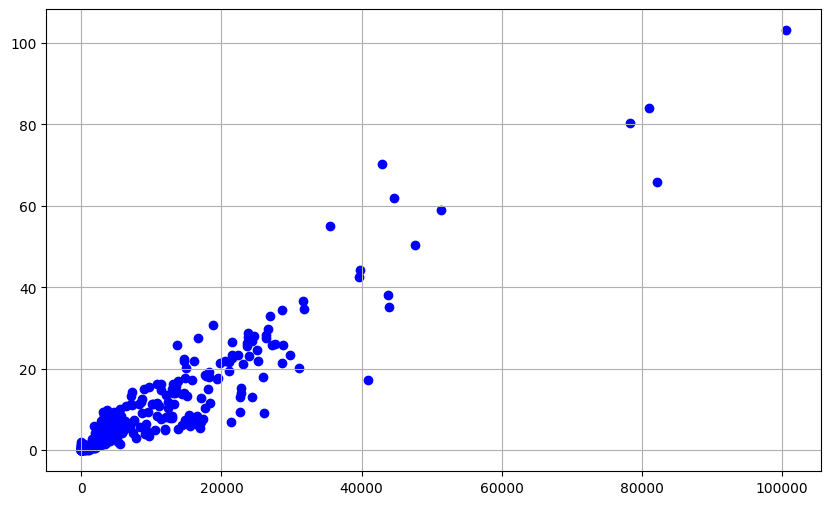

In [40]:
# Напишите свой код в данной ячейке

def make_plot(x, y, coeff=np.nan, inter=np.nan):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    if not np.isnan(coeff) and not np.isnan(inter):
        line_x = np.linspace(min(x), max(x), 100)
        line_y = coeff * line_x + inter
        plt.plot(line_x, line_y, color='red')
        
    plt.grid()
    plt.show()

make_plot(df['Monetized Playbacks (Estimate)'], df['Estimated Revenue (USD)'])

## Задание 3

Разделите данные на обучающую и тестовую выборку. Постройте для обучающей выборки линейную регрессию: самостоятельно или воспользовавшись средствами библиотеки sklearn.

Постройте найденную прямую на диаграмме рассеяния, вычислите коэффициент детерминации на тестовой выборке.

In [41]:
# Напишите свой код в данной ячейке
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

X, Y = np.array(df['Monetized Playbacks (Estimate)']), np.array(df['Estimated Revenue (USD)'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)  



LinearRegression()

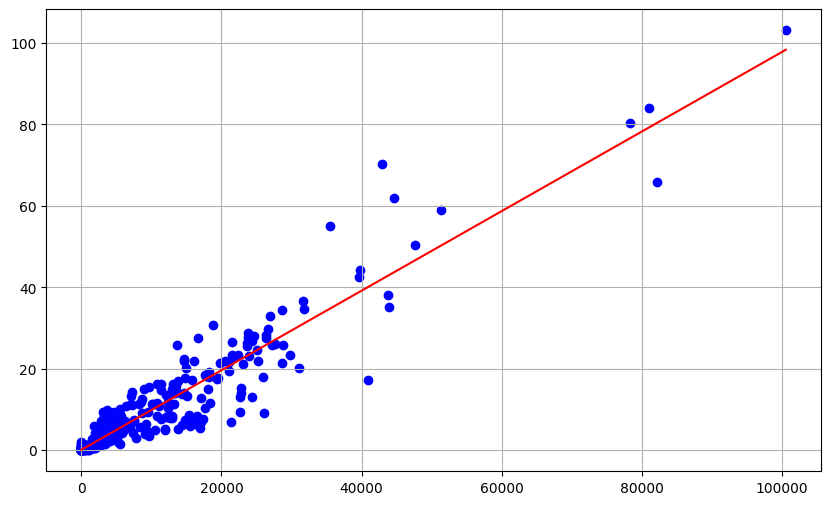

In [42]:
make_plot(X, Y, model.coef_, model.intercept_)

In [43]:
y_pred = model.predict(x_test.reshape(-1,1))
r2 = r2_score(y_test, y_pred)
r2

0.8764432026544988

## Задание 4
Рассмотрите теперь несколько столбцов в качестве признаков, постройте множественную линейную регрессию и вычислите коэффициент детерминации в этом случае.

In [44]:
df[['Monetized Playbacks (Estimate)', 'Revenue per 1000 Views (USD)']]

,Monetized Playbacks (Estimate),Revenue per 1000 Views (USD)
0,723.0,0.024
1,727.0,0.056
2,76.0,0.014
3,18.0,0.004
4,0.0,0.000
...,...,...
359,4104.0,0.806
360,3273.0,1.050
361,3605.0,1.161
362,2338.0,0.547


In [45]:
df['Estimated Revenue (USD)']

0      0.561
1      0.648
2      0.089
3      0.017
4      0.000
       ...  
359    8.063
360    8.705
361    9.852
362    3.858
363    5.915
Name: Estimated Revenue (USD), Length: 364, dtype: float64

In [46]:
# Напишите свой код в данной ячейке

X, Y = np.array(df[['Monetized Playbacks (Estimate)', 'Revenue per 1000 Views (USD)']]), np.array(df['Estimated Revenue (USD)'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)  

LinearRegression()

In [47]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.9199197645814653